### Questions to Investigate: In this part of the analysis the first question will be explored.

### 1) Who Are the bikers- A general overview.



In [2]:
#importing libraries
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms, pyplot as plt
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [3]:
# recall the stored dataset for analysis
%store -r df

In [4]:
#Colors that will be used throughout the analysis- taken from ref 2 accessed during Dec-2018
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

** Note: This is a convenient way of calling colors taken from Ref-02**


In [5]:
#shape of the dataset
df.shape

(1651156, 26)

In [6]:
#first three rows
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Wed,2018,1,22,19,1254.733333,Weekday,32,Winter,2.488001
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Wed,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Wed,2018,1,19,6,666.100000,Weekday,27,Winter,2.443038


In [7]:
#Number of Unique starting station
df.start_station_id.nunique()

327

In [8]:
#Number of Unique ending station
df.end_station_id.nunique()

327

In [9]:
#Number of Unique bike id 
df.bike_id.nunique()

3933

**1-A. Percentage of Subscribers and Customers**

In [10]:
#find the percentage of subscribers and customers
user_percentage =  df['user_type'].value_counts()/df.shape[0]*100
user_percentage

Subscriber    88.611918
Customer      11.388082
Name: user_type, dtype: float64

**1-B.Gender distribution**

In [11]:
#find the percentage of gender distribution among the bikers
df_gender = df['member_gender'].value_counts()/df.shape[0]*100
df_gender

Male      73.535995
Female    24.922115
Other      1.541889
Name: member_gender, dtype: float64

**1-C. Age distribution**

In [12]:
#Finding the minimum and the maximum of age
df['age'].min(), df['age'].max() 

(18, 137)

In [13]:
# Calculaitng 99% percentile
ninetynine_percentile_age = np.percentile(df.age, 80)
ninetynine_percentile_age

43.0

Text(0.58,0.45,'$\\bf{18\\ to\\ 43\\ years}$')

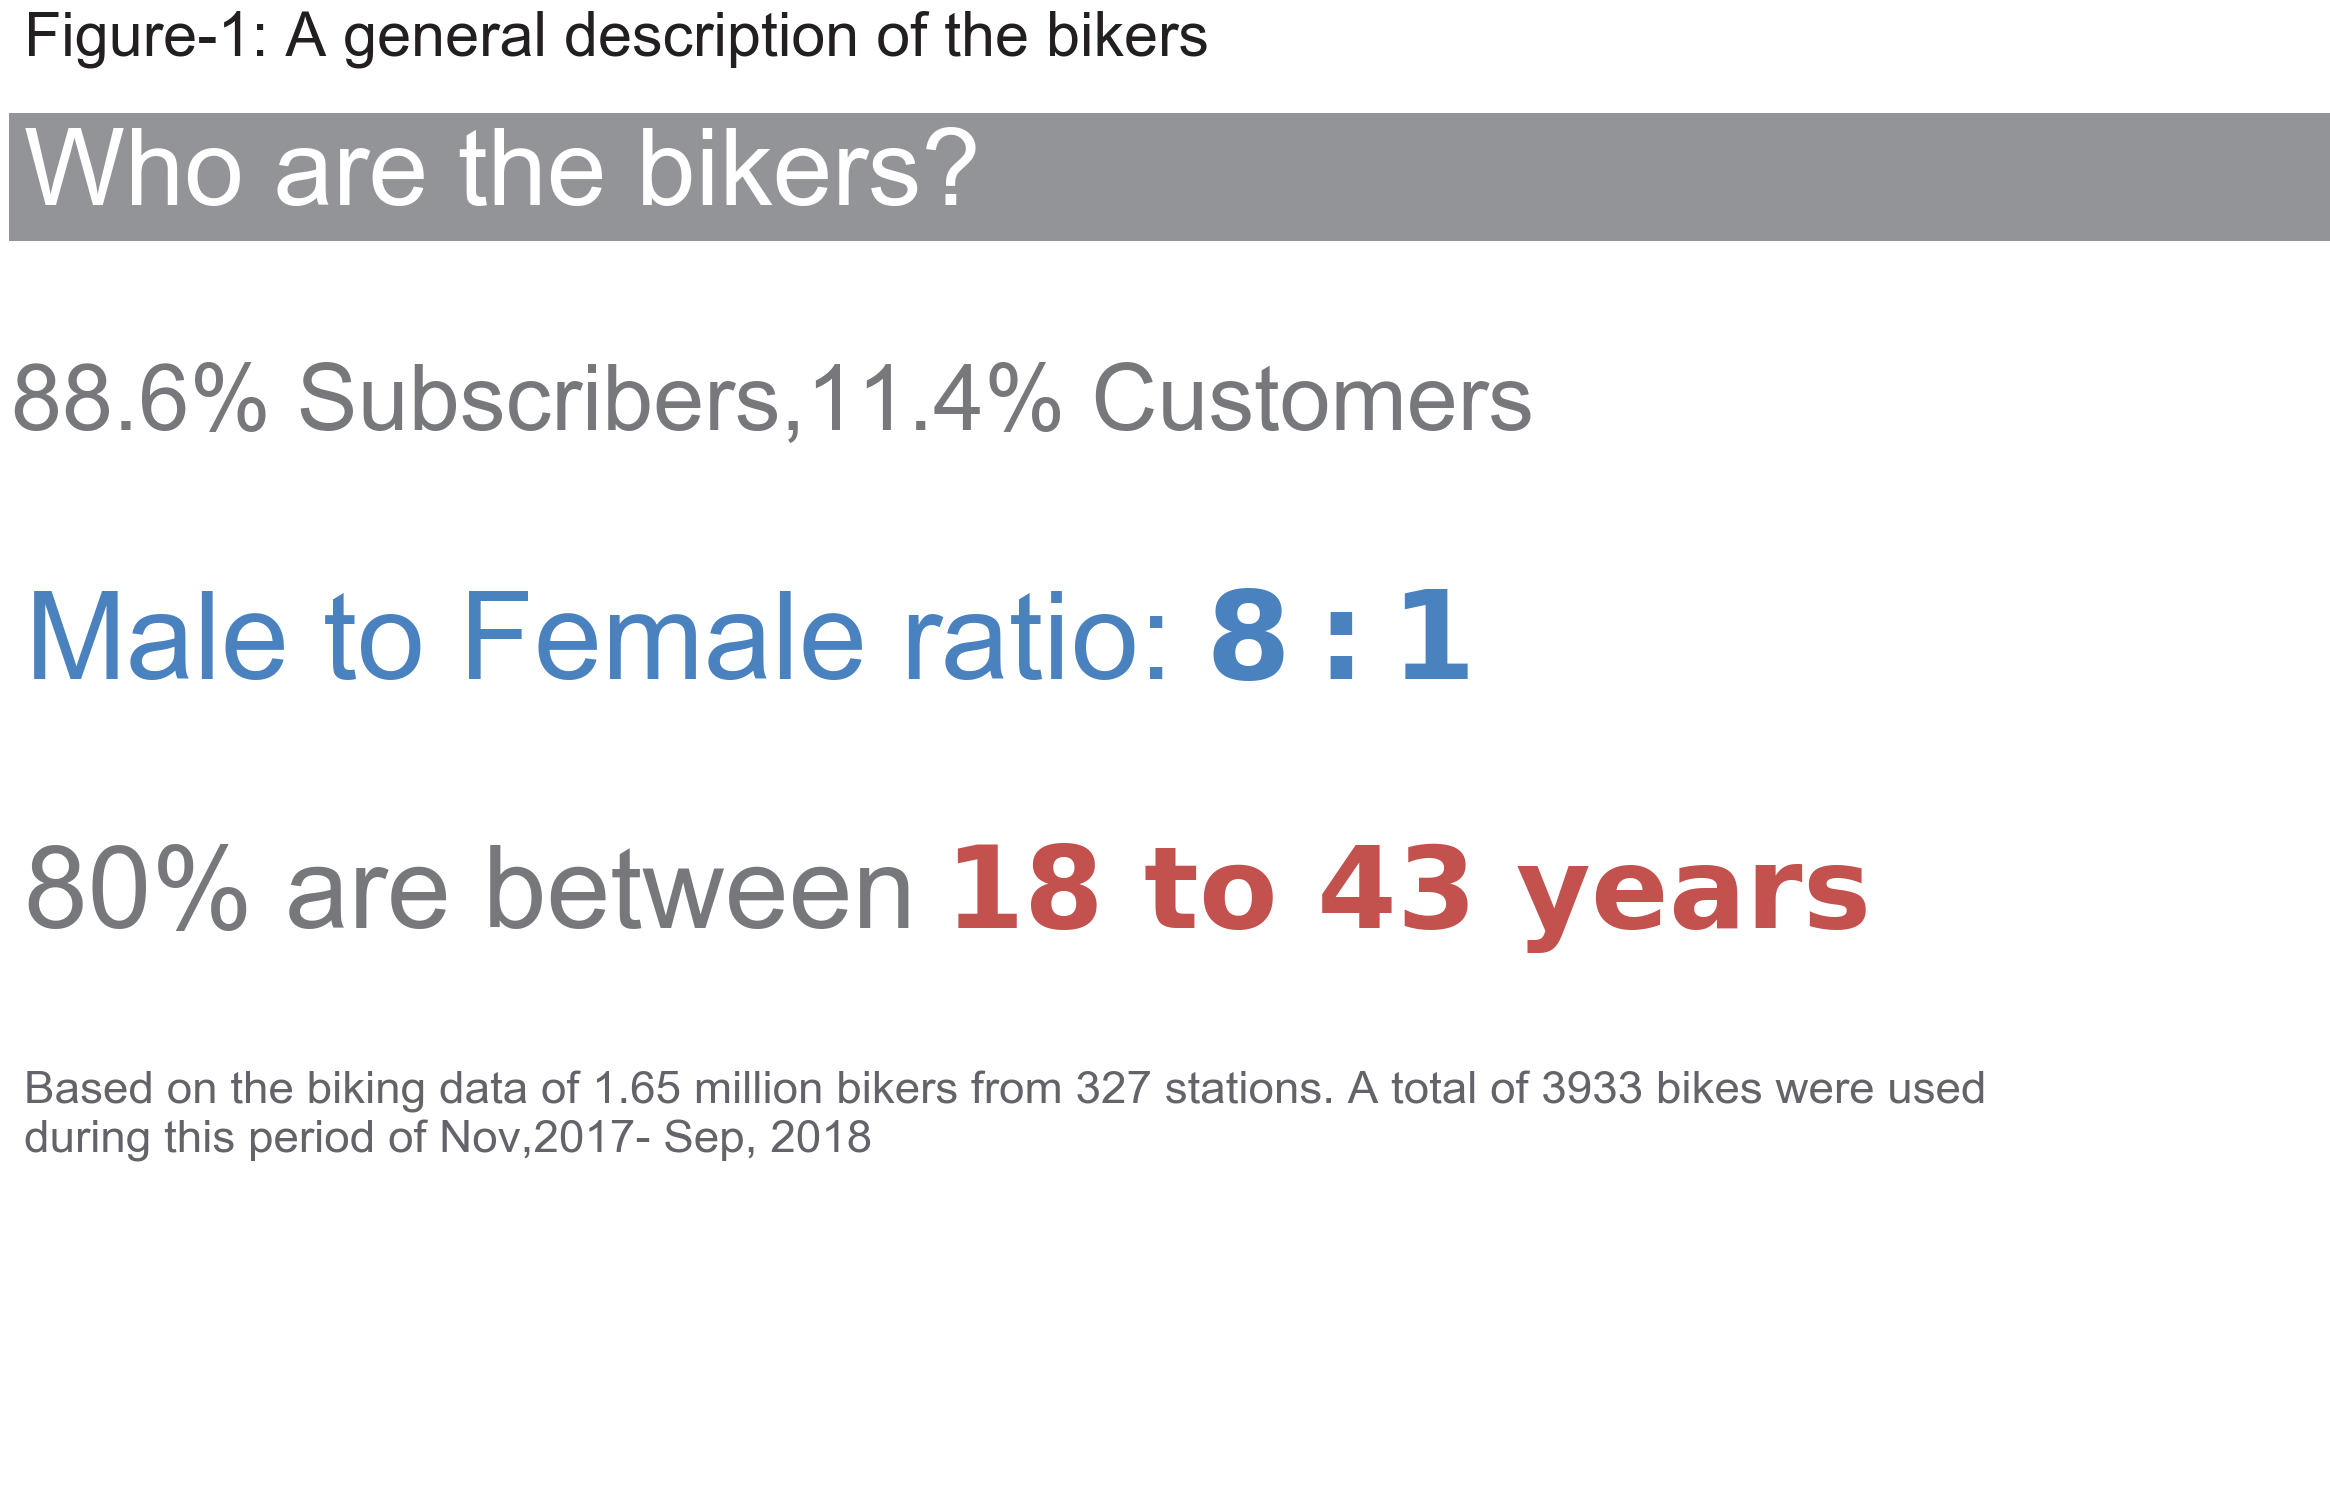

In [293]:
# create new figure
plt.figure(figsize=(15, 15), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

# titile the plot
plt.text(-0.14, 1.03,'Who are the bikers?'+' '*45,fontsize=70,color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})


plt.text(-0.14, 1.15, "Figure-1: A general description of the bikers",fontsize=40, color=GRAY1)

# footnote with the data source

plt.text(-0.14, 0.27,

         'Based on the biking data of 1.65 million bikers from 327 stations. A total of 3933 bikes were used'
         '\nduring this period of Nov,2017- Sep, 2018', fontsize=30, color=GRAY4)

# add note to the plot
plt.text(-0.15, 0.85, '88.6% Subscribers,11.4% Customers',fontsize=60, color=GRAY5)

plt.text(-0.14, 0.65, 'Male to Female ratio: $\\bf{8:1}$',fontsize=80, color=BLUE2)

# footnote with the data source
plt.text(-0.14, 0.45, '80% are between',fontsize=75, color=GRAY5)

# footnote with the data source
plt.text(0.58, 0.45, '$\\bf{18\ to\ 43\ years}$',fontsize=75, color=RED1)



### 2. When do they bike?

**2-A What is the peak hours for the bikers?**

In [26]:
df_subscriber = df.query('user_type == "Subscriber"')
df_customer = df.query('user_type == "Customer"')

In [27]:
df_sub_per_hour = df_subscriber.groupby(['start_hour']).size().reset_index(name='number_sub')
df_cus_per_hour = df_customer.groupby(['start_hour']).size().reset_index(name='number_cus')

In [28]:
df_cus_per_hour

,start_hour,number_cus
0,0,1067
1,1,559
2,2,393
3,3,151
4,4,155
5,5,510
6,6,1815
7,7,5685
8,8,12221
9,9,10696


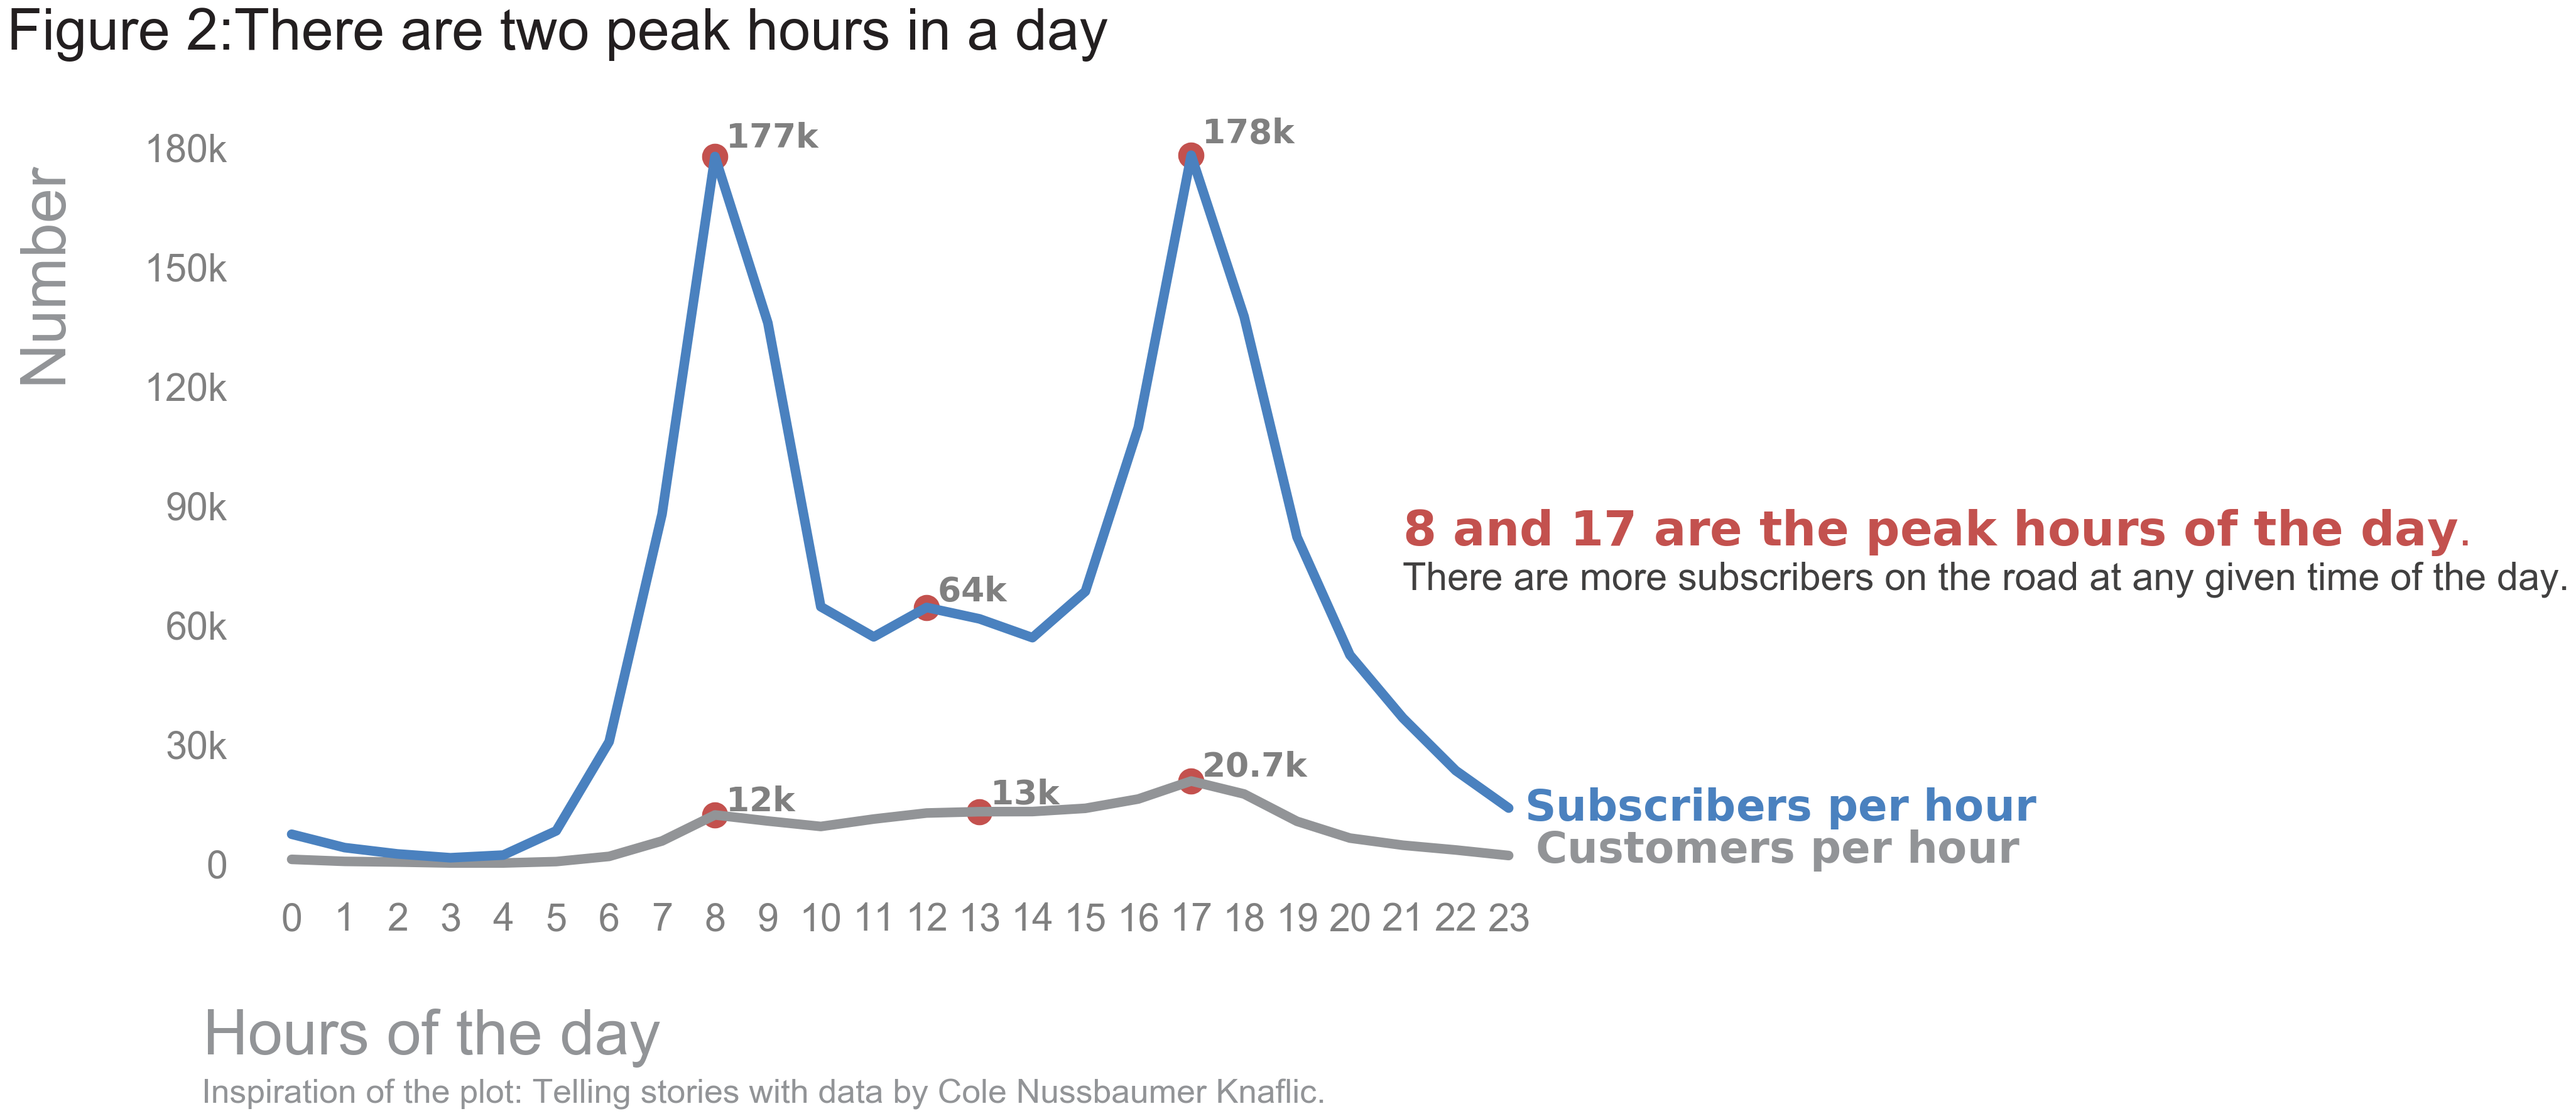

In [77]:
plt.figure(figsize = [25, 15], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
color = sns.color_palette()
base_color = sns.color_palette()[0]
plt.plot('start_hour','number_cus', data=df_cus_per_hour, color = GRAY7, linewidth=10)

plt.plot('start_hour','number_sub', data=df_sub_per_hour , color=BLUE2, linewidth=10)

#plt.axvline(x=8, ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=17,ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=13,ymin= 0.1, ymax=0.2, color=GRAY7, linewidth=5)

plt.text(23.3,11000, '$\\bf{Subscribers\ per\ hour}$', fontsize='45', color=BLUE2)
plt.text(23.5,400, '$\\bf{Customers\ per\ hour}$', fontsize='45', color=GRAY7)


plt.scatter(8, df_sub_per_hour['number_sub'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(12, df_sub_per_hour['number_sub'][12], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_sub_per_hour['number_sub'][17], s=150, color=RED1, clip_on=False, linewidth=15)


plt.text(8.2,180e3, '$\\bf{177k}$', fontsize='35', color='grey')
plt.text(12.2,66e3, '$\\bf{64k}$', fontsize='35', color='grey')
plt.text(17.2,181e3, '$\\bf{178k}$', fontsize='35', color='grey')


plt.scatter(8, df_cus_per_hour['number_cus'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(13, df_cus_per_hour['number_cus'][13], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_cus_per_hour['number_cus'][17], s=150, color=RED1, clip_on=False, linewidth=15)

plt.text(8.2,13.3e3, '$\\bf{12k}$', fontsize='35', color='grey')
plt.text(13.2,15e3, '$\\bf{13k}$', fontsize='35', color='grey')
plt.text(17.2,22e3, '$\\bf{20.7k}$', fontsize='35', color='grey')

plt.text(21, 80e3,
         '$\\bf{8\ and\ 17\ are\ the\ peak\ hours\ of\ the\ day}$.', fontsize=50, color=RED1, linespacing=1.4)
plt.text(21, 69e3,
         'There are more subscribers on the road at any given time of the day.', fontsize=40, color=GRAY2, linespacing=1.4)

plt.title('Figure 2:There are two peak hours in a day \n',fontsize=60, color=GRAY1, x=0.25,  y=1.0)
plt.xlabel("\nHours of the day",fontsize=65, color=GRAY7, x=0.15)
plt.ylabel("Number\n",fontsize=65, color=GRAY7, x=0, y=0.8)

plt.text(-1.7, -60e3, 'Inspiration of the plot: Telling stories with data by Cole Nussbaumer Knaflic.', fontsize=35, color=GRAY7,linespacing=1.4)



plt.xticks(np.arange(0, 24, 1.0),fontsize=40, color ='grey')
plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=40, color ='grey')
plt.yticks([0, 30000, 60000, 90000,  120000, 150000, 180000], [0,'30k', '60k', '90k', '120k',  '150k', '180k'])

sns.despine(bottom=True, left=True)
plt.show()

**2-B Do the peak hours vary during the weekdays and the weekends?**

In [82]:
df_weekend = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')
df_weekdays = df.query('day_type == "Weekday"')['start_hour'].value_counts().sort_index()

In [83]:
df_weekday = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')[0:24]
df_weekend = df.groupby(['day_type'])['start_hour'].value_counts().sort_index().reset_index(name='number')[24:48]
df_weekend.number.max()

23856

In [84]:
df_weekend

,day_type,start_hour,number
24,Weekend,0,3677
25,Weekend,1,2222
26,Weekend,2,1333
27,Weekend,3,632
28,Weekend,4,428
29,Weekend,5,813
30,Weekend,6,1611
31,Weekend,7,3658
32,Weekend,8,8052
33,Weekend,9,12796


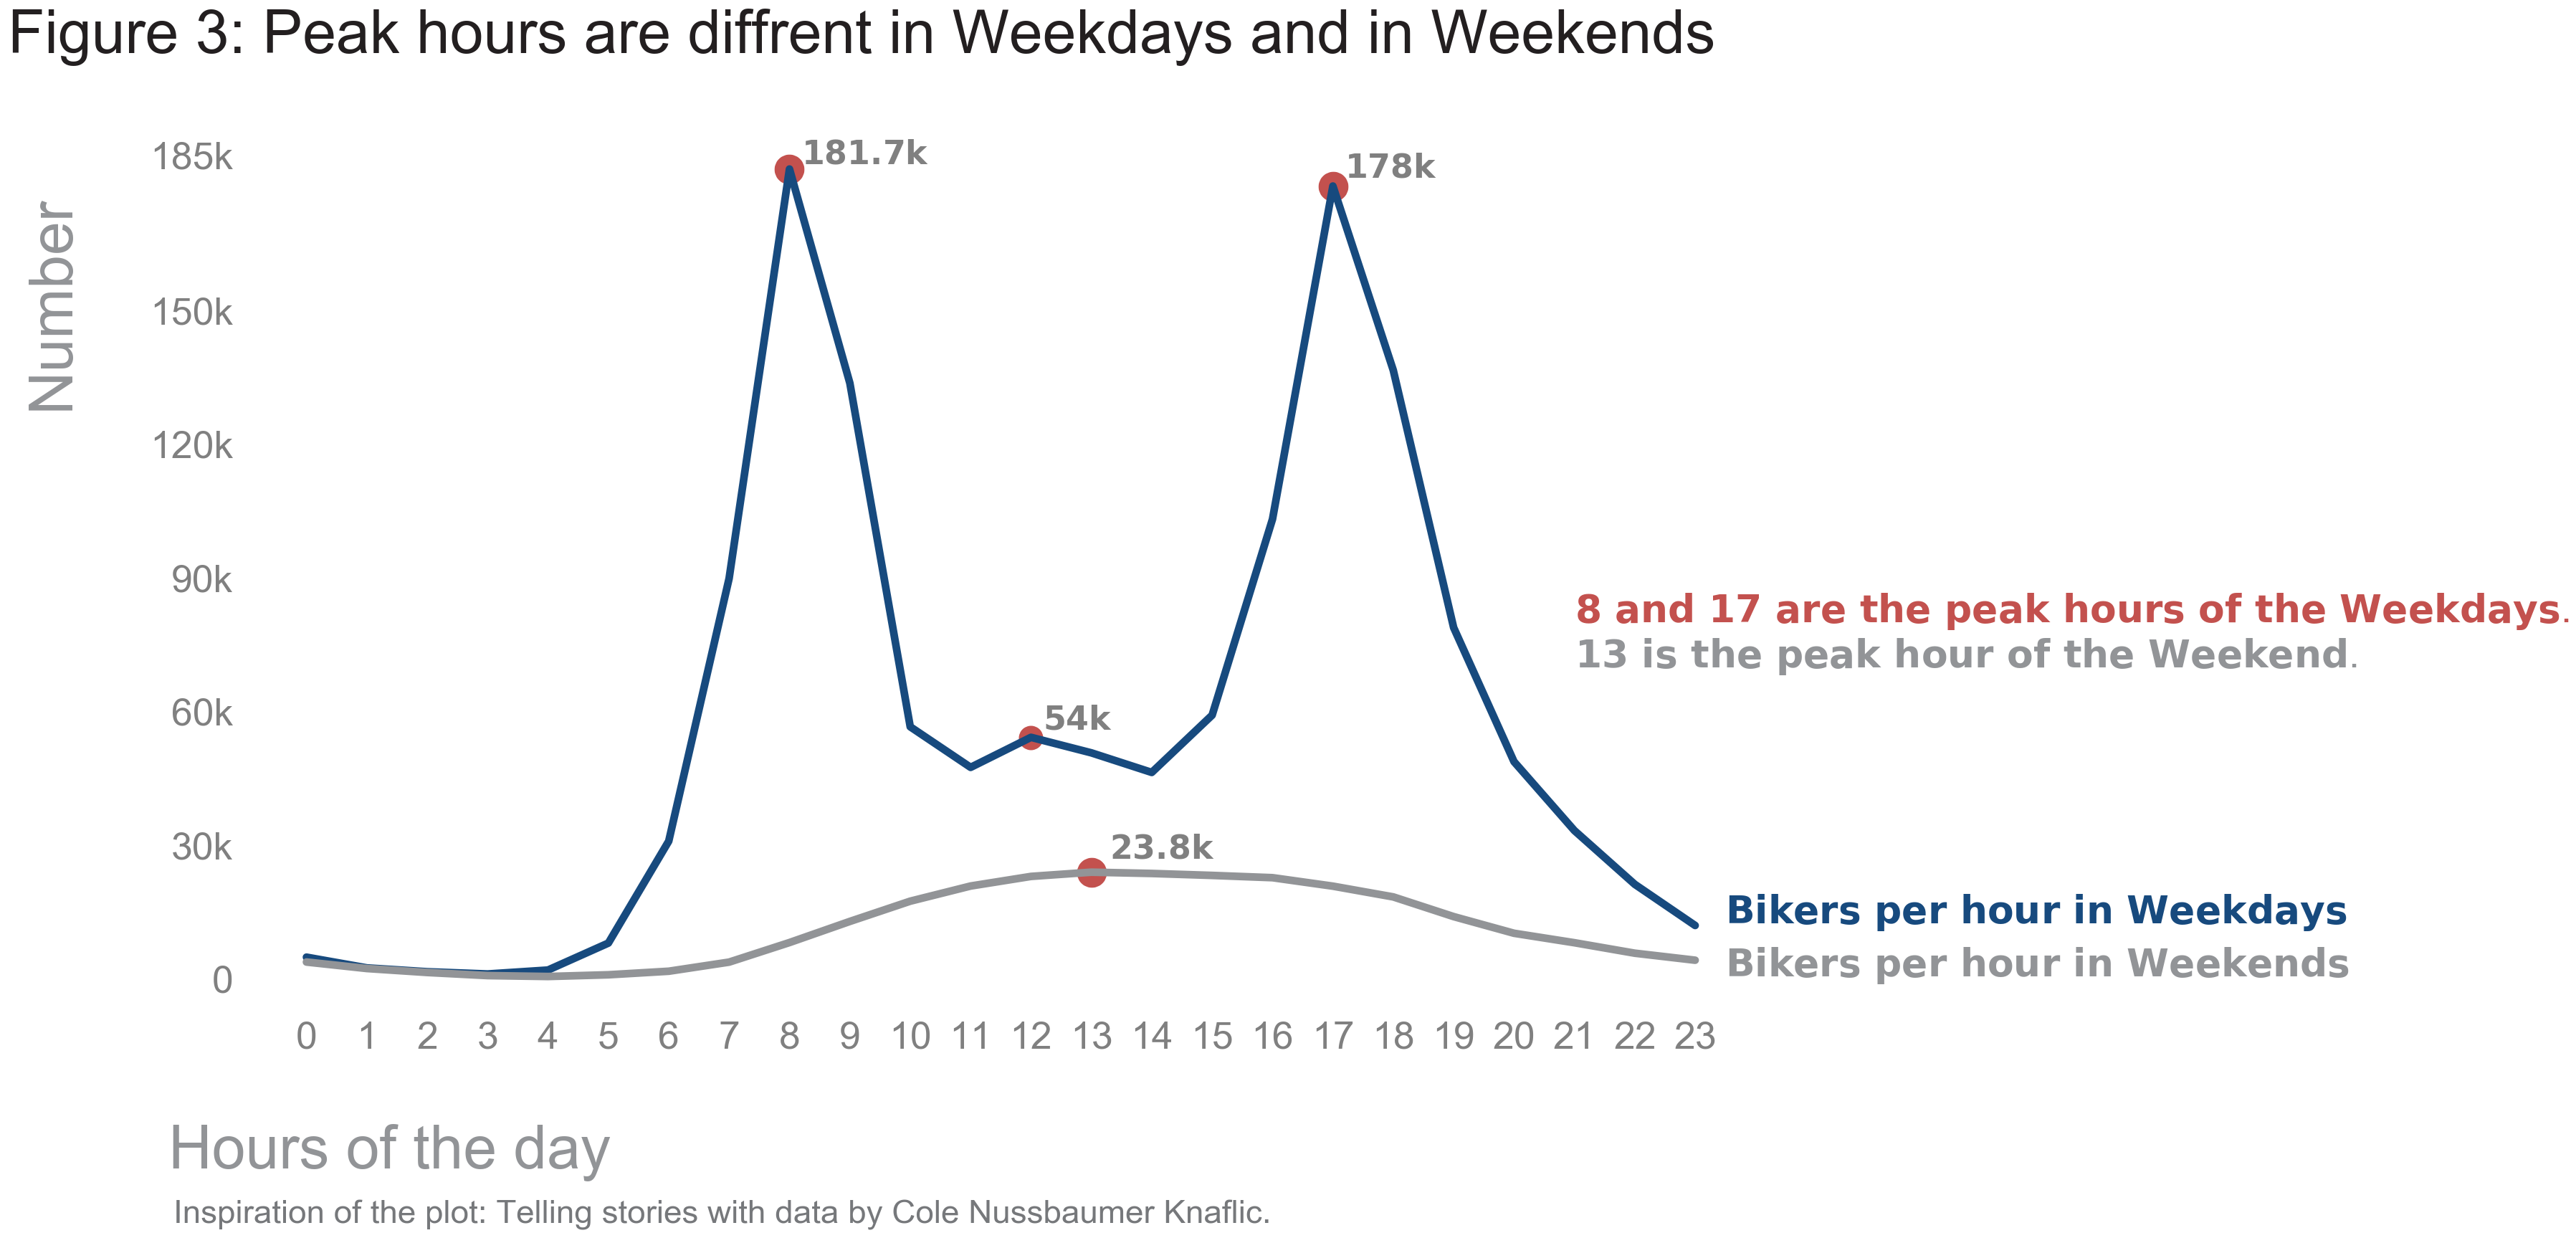

In [112]:
plt.figure(figsize = [25, 15], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
color = sns.color_palette()
base_color = sns.color_palette()[0]
plt.plot('start_hour','number', data=df_weekday, color = BLUE1, linewidth=7)

plt.plot('start_hour','number', data=df_weekend , color=GRAY7, linewidth=7)

#plt.axvline(x=8, ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=17,ymax=1, color=GRAY2, linewidth=2)
#plt.axvline(x=13,ymin= 0.1, ymax=0.2, color=GRAY7, linewidth=5)

plt.text(23.5,12500, '$\\bf{Bikers\ per\ hour\ in \ Weekdays}$', fontsize='35', color=BLUE1)
plt.text(23.5,500, '$\\bf{Bikers\ per\ hour\ in \ Weekends}$', fontsize='35', color=GRAY7)



plt.scatter(8, df_weekday['number'][8], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(17, df_weekday['number'][17], s=150, color=RED1, clip_on=False, linewidth=15)
plt.scatter(12, df_weekday['number'][12], s=150, color=RED1, clip_on=False, linewidth=10)


plt.text(8.2,183e3, '$\\bf{181.7k}$', fontsize='30', color='grey')
plt.text(12.2,56e3, '$\\bf{54k}$', fontsize='30', color='grey')
plt.text(17.2,180e3, '$\\bf{178k}$', fontsize='30', color='grey')


plt.scatter(13, df_weekend['number'][37], s=150, color=RED1, clip_on=False, linewidth=15)
plt.text(13.3,27e3, '$\\bf{23.8k}$', fontsize='30', color='grey')

plt.text(21, 80e3,
         '$\\bf{8\ and\ 17\ are\ the\ peak\ hours\ of\ the\ Weekdays}$.', fontsize=35, color=RED1, linespacing=1.4)
plt.text(21, 70e3,
         '$\\bf{13\ is\ the\ peak\ hour\ of\ the\ Weekend}$.', fontsize=35, color=GRAY7, linespacing=1.4)

plt.title('Figure 3: Peak hours are diffrent in Weekdays and in Weekends \n',fontsize=55,loc="left", color=GRAY1, x=-0.15, y=1)
plt.xlabel("\nHours of the day",fontsize=55, color=GRAY7, x=0.1)
plt.ylabel("Number\n",fontsize=55, color=GRAY7, x=0, y=0.8)

plt.text(-2.2, -55e3, 'Inspiration of the plot: Telling stories with data by Cole Nussbaumer Knaflic.', fontsize=30, color=GRAY5,linespacing=1.4)



plt.xticks(np.arange(0, 24, 1.0),fontsize=35, color ='grey')
plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=35, color ='grey')
plt.yticks([0, 30000, 60000, 90000,  120000, 150000, 185000], [0,'30k', '60k', '90k', '120k',  '150k', '185k'])

sns.despine(bottom=True, left=True)
plt.show()

**2-C What is the busiest day(s) of the week?**

In [114]:
journey_per_day = df['day'].value_counts()/df['day'].value_counts().sum()*100
journey_per_day

Wed    17.618020
Tue    17.581682
Thu    16.886896
Mon    15.887778
Fri    15.661936
Sat     8.701479
Sun     7.662208
Name: day, dtype: float64

In [115]:
new_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [116]:
journey_per_day = journey_per_day.reindex(new_index)
journey_per_day 

Mon    15.887778
Tue    17.581682
Wed    17.618020
Thu    16.886896
Fri    15.661936
Sat     8.701479
Sun     7.662208
Name: day, dtype: float64

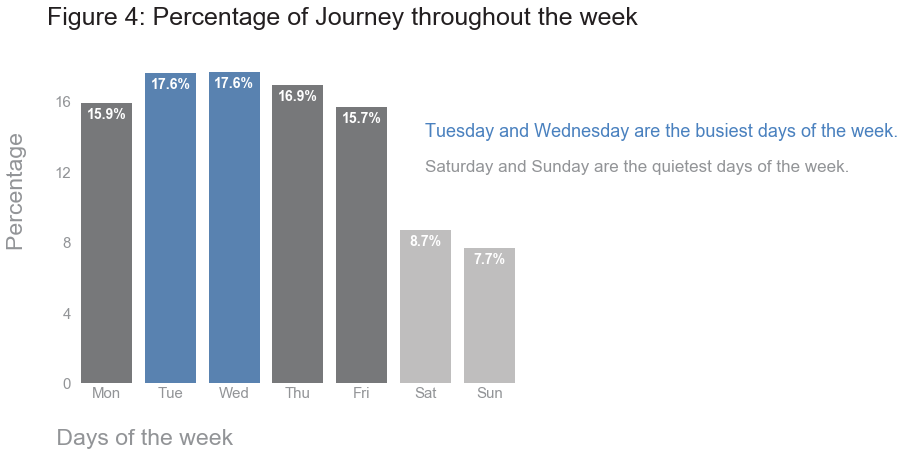

In [142]:
values = np.array(journey_per_day)  
idx = np.array(list(journey_per_day.index)) 

color = sns.color_palette()
base_color = sns.color_palette()[0]
#clrs = [GRAY9 if (x < 17.5) else BLUE2 for x in values ]

clrs = [GRAY5, BLUE2, BLUE2, GRAY5, GRAY5, GRAY9, GRAY9]

plt.figure(figsize = [8, 6])
ax = sns.barplot(x=idx, y=values, palette=clrs)

y_data = pd.Series(journey_per_day)
x_labels = journey_per_day.index
plt.yticks(np.arange(0, 20, 4.0), fontsize=15,color=GRAY7)
plt.xticks(fontsize=15,color=GRAY7)

plt.xlabel(" \n Days of the week",fontsize=23,color=GRAY7, x=0.15)
plt.ylabel("Percentage \n",fontsize=23,color=GRAY7, y=0.6)
plt.title('Figure 4: Percentage of Journey throughout the week\n',fontsize=25, color=GRAY1, x=0.60)

plt.text(5, 14,'Tuesday and Wednesday are the busiest days of the week.', fontsize=18, color=BLUE2, linespacing=1.4)
plt.text(5, 12,'Saturday and Sunday are the quietest days of the week.', fontsize=17, color=GRAY7, linespacing=1.4)

# Plot the figure.
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -18 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place 

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=14, color= 'white', fontweight='bold')
    sns.despine(bottom=True, left=True)
    
   

In [143]:
new_index_month = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [144]:
journey_per_month = df['month'].value_counts()/df['month'].value_counts().sum()*100
journey_per_month

Oct    11.597027
Jul    11.125175
Jun    10.986545
Aug    10.803037
Sep    10.584584
May    10.136898
Apr     7.376105
Mar     6.198506
Feb     5.973149
Jan     5.266795
Nov     5.213923
Dec     4.738256
Name: month, dtype: float64

In [145]:
journey_per_month = journey_per_month.reindex(new_index_month)
journey_per_month = journey_per_month.rename_axis('Month').reset_index(name='percentage')
journey_per_month

,Month,percentage
0,Nov,5.213923
1,Dec,4.738256
2,Jan,5.266795
3,Feb,5.973149
4,Mar,6.198506
5,Apr,7.376105
6,May,10.136898
7,Jun,10.986545
8,Jul,11.125175
9,Aug,10.803037


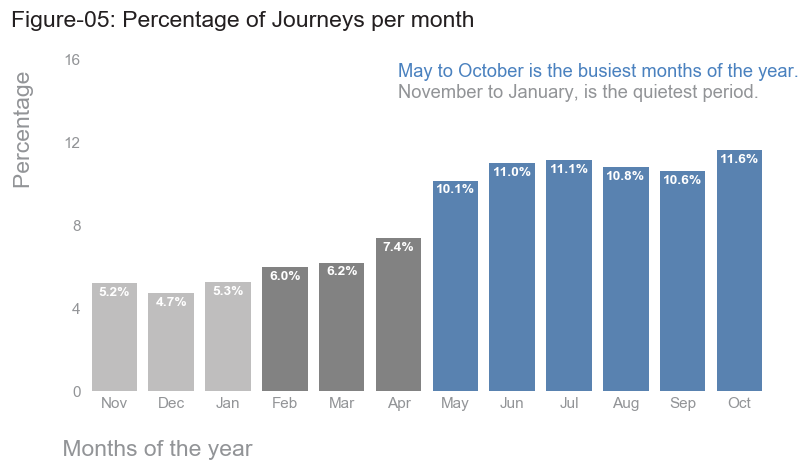

In [287]:
values = np.array(journey_per_month['percentage'])  
idx = np.array(list(journey_per_month['Month'])) 



clrs = [GRAY9, GRAY9, GRAY9,GRAY6, GRAY6,GRAY6,BLUE2,BLUE2,BLUE2,BLUE2,BLUE2,BLUE2]

plt.figure(figsize = [8, 4], dpi=110)
ax = sns.barplot(x=idx, y=values, palette=clrs)



y_data = pd.Series(journey_per_month['percentage'])
x_labels = journey_per_month['Month']
plt.yticks(np.arange(0, 20, 4.0), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

plt.xlabel(" \n Months of the year",fontsize=15,color=GRAY7, x=0.1)
plt.ylabel("Percentage \n",fontsize=15,color=GRAY7, y=0.8)
plt.title('Figure-05: Percentage of Journeys per month\n',fontsize=15, color=GRAY1, x=0.23)

plt.text(5, 14, 'May to October is the busiest months of the year.\n', fontsize=12, color=BLUE2, linespacing=1.4)

plt.text(5, 13,'November to January, is the quietest period.\n', fontsize=12, color=GRAY7, linespacing=1.4)

# Plot the figure.
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=9, color= 'white',fontweight='bold')
    sns.despine(bottom=True, left=True)
    

In [176]:
df_customer.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Wed,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357
28,592,2018-01-31 22:53:27.779,2018-01-31 23:03:20.290,202.0,Washington St at 8th St,37.800754,-122.274894,195.0,Bay Pl at Vernon St,37.812314,...,Wed,2018,1,22,23,9.866667,Weekday,40,Winter,1.786456
34,870,2018-01-31 22:45:38.235,2018-01-31 23:00:09.034,285.0,Webster St at O'Farrell St,37.783521,-122.431158,106.0,Sanchez St at 17th St,37.763242,...,Wed,2018,1,22,23,14.500000,Weekday,28,Winter,2.251228


In [177]:
customer_per_month = df_customer.month.value_counts()
customer_per_month = customer_per_month.reindex(new_index_month)
customer_per_month= customer_per_month.rename_axis('Month').reset_index(name='customer_no')
customer_per_month

,Month,customer_no
0,Nov,8331
1,Dec,6222
2,Jan,6285
3,Feb,8762
4,Mar,9392
5,Apr,13997
6,May,20595
7,Jun,23336
8,Jul,25022
9,Aug,22799


In [178]:
subscriber_per_month = df_subscriber.month.value_counts()
subscriber_per_month = subscriber_per_month.reindex(new_index_month)
subscriber_per_month= subscriber_per_month.rename_axis('Month').reset_index(name='subscriber_no')
subscriber_per_month

,Month,subscriber_no
0,Nov,77759
1,Dec,72014
2,Jan,80678
3,Feb,89864
4,Mar,92955
5,Apr,107794
6,May,146781
7,Jun,158069
8,Jul,158672
9,Aug,155576


In [179]:
user_type_duration = pd.merge(subscriber_per_month, customer_per_month)
user_type_duration

,Month,subscriber_no,customer_no
0,Nov,77759,8331
1,Dec,72014,6222
2,Jan,80678,6285
3,Feb,89864,8762
4,Mar,92955,9392
5,Apr,107794,13997
6,May,146781,20595
7,Jun,158069,23336
8,Jul,158672,25022
9,Aug,155576,22799


Text(-1.8,215000,'$\\bf{Both\\ Customers\\ and\\ Subscribers\\ prefer\\ May\\ to\\ Sep\\ for\\ Biking.}$')

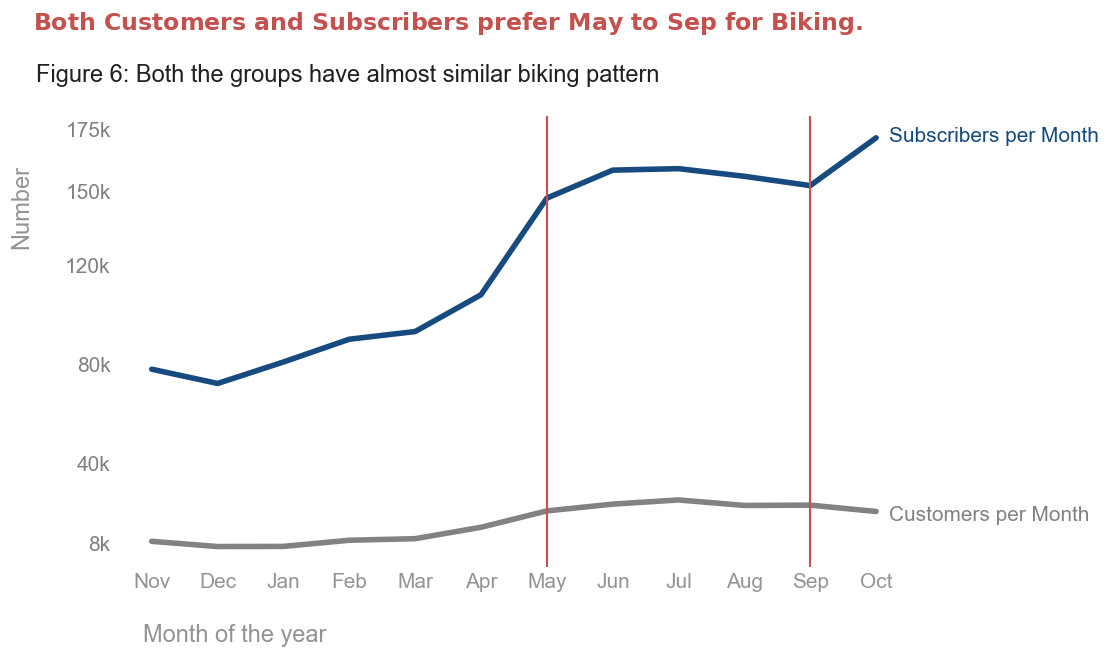

In [276]:
# create new figure
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100) # width, height in inches
                             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)


plt.plot(range(12), user_type_duration['subscriber_no'], linewidth=4, color=BLUE1)
#plt.scatter(range(12)[-6:-1], user_type_duration['subscriber_no'][-6:-1], s=90, color=GRAY6, clip_on=False, linewidth=2)

plt.plot(range(12), user_type_duration['customer_no'], linewidth=4, color=GRAY6)
#plt.scatter(range(12)[-6:-1], user_type_duration['customer_no'][-6:-1], s=90, color=BLUE1, clip_on=False, linewidth=2)

plt.axvline(x=10, color=RED1)
plt.axvline(x=6, color=RED1)

plt.yticks(np.arange(0, max(user_type_duration['subscriber_no'])+15000, 10000.0),fontsize=15, color ='grey')
plt.yticks([8000, 40000, 80000, 120000, 150000, 175000], ['8k', '40k', '80k',
                                                                               '120k', '150k', '175k'])
plt.text(11.2,17e3, 'Customers per Month', fontsize='15', color=GRAY6)
plt.text(11.2,170e3, 'Subscribers per Month', fontsize='15', color=BLUE1)

# set properties for axes object
plt.setp(ax1, xticks=list(range(12)), xticklabels=user_type_duration['Month'])
plt.xticks(fontsize=15,color=GRAY7)
sns.despine(bottom=True, left=True)

plt.title('Figure 6: Both the groups have almost similar biking pattern\n',fontsize=17,loc="left", color=GRAY1, x=-0.10)
plt.xlabel("\nMonth of the year",fontsize=17, color=GRAY7,x=0.15)
plt.ylabel("Number\n",fontsize=17, color=GRAY7, y=0.8)

    
plt.text(-1.8, 215e3,
         '$\\bf{Both\ Customers\ and\ Subscribers\ prefer\ May\ to\ Sep\ for\ Biking.}$'
         ,fontsize=17, color=RED1, linespacing=1.4)

#plt.text(-0.65, 205e3, '\nAn almost similar biking pattern is observed for both the groups.\n', fontsize=15, color=RED1, linespacing=1.4)



In [181]:
journey_per_season = df['season'].value_counts()/df['season'].value_counts().sum()*100
journey_per_season= journey_per_season.rename_axis('season').reset_index(name='percentage')
journey_per_season

,season,percentage
0,Summer,32.914758
1,Autumn,27.395534
2,Spring,23.711509
3,Winter,15.978200


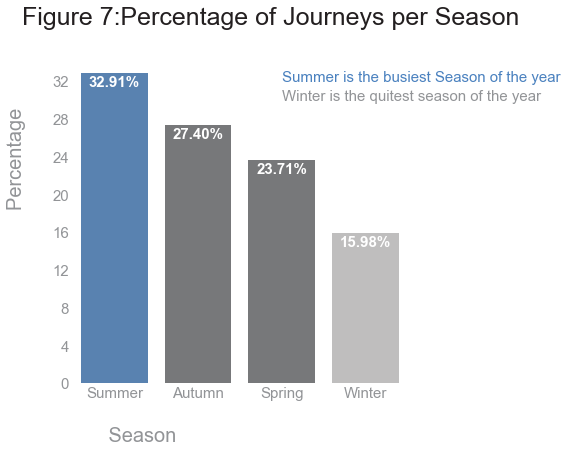

In [284]:
values = np.array(journey_per_season['percentage'])  
idx = np.array(list(journey_per_season['season'])) 

#color = sns.color_palette()
#base_color = sns.color_palette()[0]
#clrs = [GRAY9 if (x < 30) else BLUE2 for x in values ]

clrs = [BLUE2,GRAY5,GRAY5, GRAY9]

plt.figure(figsize = [6, 6])
ax = sns.barplot(x=idx, y=values, palette=clrs)

y_data = pd.Series(journey_per_season['percentage'])
x_labels = journey_per_season['season']
plt.yticks(np.arange(0, 36, 4.0), fontsize=15,color=GRAY7)
plt.xticks(fontsize=15,color=GRAY7)



plt.xlabel(" \n Season",fontsize=20,color=GRAY7, x=.20)
plt.ylabel("Percentage \n",fontsize=20,color=GRAY7, y=0.7)
plt.title('Figure 7:Percentage of Journeys per Season\n',fontsize=25,loc="left", color=GRAY1, x=-0.15)

plt.text(2, 30,
         'Summer is the busiest Season of the year\n', 
         fontsize=15, color=BLUE2, linespacing=1.4)

plt.text(2, 28,
         'Winter is the quitest season of the year\n', 
         fontsize=15, color=GRAY7, linespacing=1.4)

# Plot the figure.
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -17 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=15, color= 'white',fontweight='bold')
sns.despine(bottom=True, left=True)
    
   

## Ref:
    
2.https://github.com/empathy87/storytelling-with-data
